In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from bokeh.io import output_file
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
s_train = pd.read_csv('datasets/clean_train.csv')
s_test = pd.read_csv('datasets/clean_test.csv')

In [3]:
s_train['gr_liv_area']

0       1479
1       2122
2       1057
3       1444
4       1445
        ... 
1981    1728
1982     861
1983    1913
1984    1200
1985    1804
Name: gr_liv_area, Length: 1986, dtype: int64

In [4]:
s_train['gr_liv_area'].isnull().sum()

0

In [5]:
#Trying out a very small model first. 
features = ['overall_qual', 'overall_cond', '1st_flr_sf', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', 'year_built', 'full_bath']
X = s_train[features]
y = s_train['saleprice']
X_test_data = s_test[features]
print(X.describe())
print(y.describe())

       overall_qual  overall_cond   1st_flr_sf   exter_qual  gr_liv_area  \
count   1986.000000   1986.000000  1986.000000  1986.000000  1986.000000   
mean       6.059919      5.580564  1141.909366     2.616818  1468.120342   
std        1.337291      1.094435   350.174731     0.557702   442.006556   
min        1.000000      1.000000   372.000000     1.000000   438.000000   
25%        5.000000      5.000000   878.000000     2.000000  1125.250000   
50%        6.000000      5.000000  1081.500000     3.000000  1432.000000   
75%        7.000000      6.000000  1368.000000     3.000000  1710.000000   
max       10.000000      9.000000  2898.000000     4.000000  2956.000000   

       garage_area  garage_cars  total_bsmt_sf   year_built    full_bath  
count  1986.000000  1986.000000    1986.000000  1986.000000  1986.000000  
mean    465.289023     1.753273    1034.634441  1971.370594     1.562437  
std     206.647658     0.746142     398.685408    29.842029     0.539034  
min       0.000

In [6]:
s_train[features].isnull().sum()

overall_qual     0
overall_cond     0
1st_flr_sf       0
exter_qual       0
gr_liv_area      0
garage_area      0
garage_cars      0
total_bsmt_sf    0
year_built       0
full_bath        0
dtype: int64

In [7]:
s_test[features].isnull().sum()

overall_qual     0
overall_cond     0
1st_flr_sf       0
exter_qual       0
gr_liv_area      0
garage_area      0
garage_cars      0
total_bsmt_sf    0
year_built       0
full_bath        0
dtype: int64

In [8]:
X.isnull().sum()

overall_qual     0
overall_cond     0
1st_flr_sf       0
exter_qual       0
gr_liv_area      0
garage_area      0
garage_cars      0
total_bsmt_sf    0
year_built       0
full_bath        0
dtype: int64

In [9]:
y.isnull().sum()

0

In [10]:
s_train['saleprice'].isnull().sum()

0

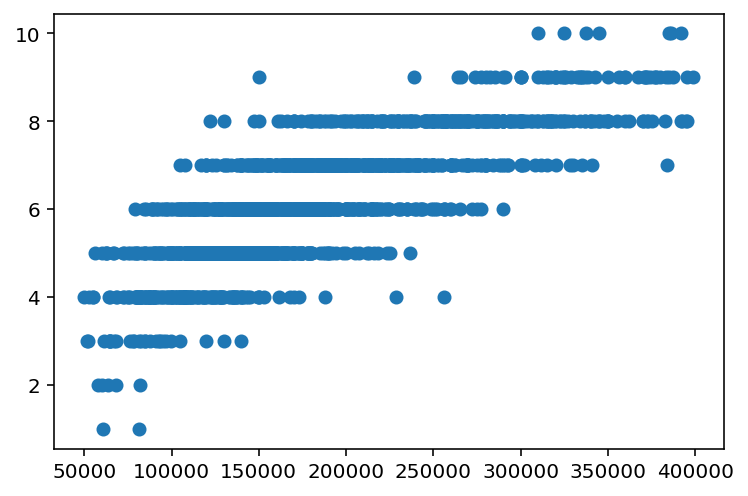

In [11]:
plt.scatter(s_train['saleprice'], s_train['overall_qual'])

In [12]:
# Output the visualization directly in the notebook
output_file('first_glyphs.html', title='First Glyphs')

# Create a figure with no toolbar and axis ranges of [0,3]
fig = figure(title='My Coordinates',
             plot_height=300, plot_width=300,
             x_range=(0, 3), y_range=(0, 3),
             toolbar_location=None)

# Draw the coordinates as circles
fig.circle(x=s_train['saleprice'], y=s_train['overall_qual'],
           color='green', size=10, alpha=0.5)

# Show plot
show(fig)

(array([ 77., 257., 581., 426., 245., 156., 112.,  67.,  36.,  29.]),
 array([ 50138. ,  85004.2, 119870.4, 154736.6, 189602.8, 224469. ,
        259335.2, 294201.4, 329067.6, 363933.8, 398800. ]),
 <BarContainer object of 10 artists>)

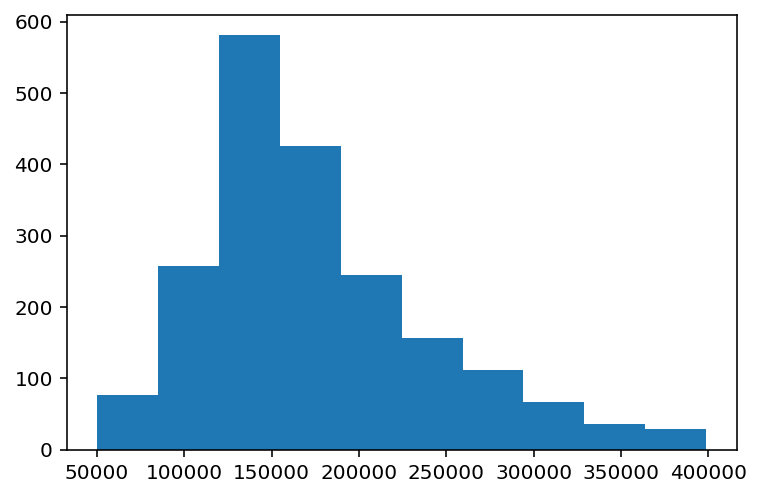

In [13]:
plt.hist(s_train['saleprice'])

(array([ 17., 192., 382., 426., 455., 246., 127.,  67.,  55.,  19.]),
 array([ 438. ,  689.8,  941.6, 1193.4, 1445.2, 1697. , 1948.8, 2200.6,
        2452.4, 2704.2, 2956. ]),
 <BarContainer object of 10 artists>)

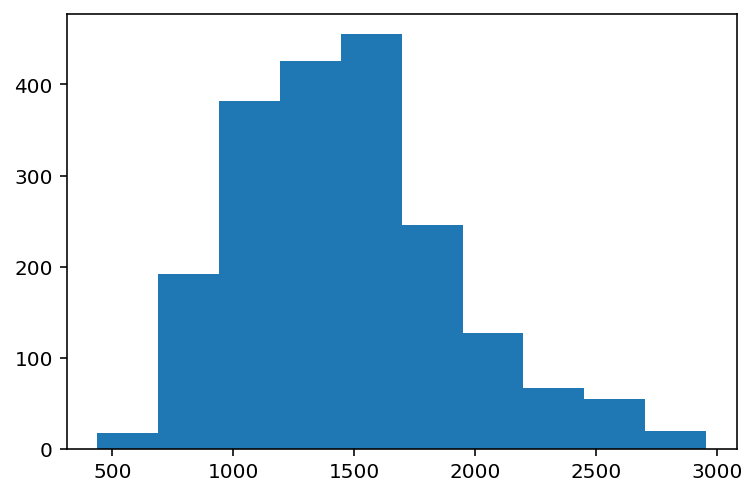

In [14]:
plt.hist(s_train['gr_liv_area'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=76)

In [16]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
X_scaled.shape

(1588, 10)

In [18]:
type(X_scaled)

numpy.ndarray

In [19]:
X_test_scaled.shape

(398, 10)

In [20]:
X_train.corr(),s_train['saleprice'].sort_values()

(               overall_qual  overall_cond  1st_flr_sf  exter_qual  \
 overall_qual       1.000000     -0.100212    0.412787   -0.702511   
 overall_cond      -0.100212      1.000000   -0.162273    0.154580   
 1st_flr_sf         0.412787     -0.162273    1.000000   -0.332183   
 exter_qual        -0.702511      0.154580   -0.332183    1.000000   
 gr_liv_area        0.528031     -0.144987    0.470794   -0.397822   
 garage_area        0.508792     -0.155180    0.438804   -0.451884   
 garage_cars        0.542141     -0.178069    0.405769   -0.472097   
 total_bsmt_sf      0.499915     -0.176419    0.774100   -0.404178   
 year_built         0.601547     -0.382360    0.302136   -0.613853   
 full_bath          0.497918     -0.248853    0.347836   -0.444305   
 
                gr_liv_area  garage_area  garage_cars  total_bsmt_sf  \
 overall_qual      0.528031     0.508792     0.542141       0.499915   
 overall_cond     -0.144987    -0.155180    -0.178069      -0.176419   
 1st_flr_sf 

In [21]:
s_train[features].sort_values(by='gr_liv_area', ascending=True)

,overall_qual,overall_cond,1st_flr_sf,exter_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,year_built,full_bath
420,2,5,438,3,438,246.0,1.0,290.0,1920,1
1589,3,5,492,3,492,200.0,1.0,492.0,1921,1
76,4,6,520,3,520,240.0,1.0,520.0,1927,1
1954,2,5,540,3,540,200.0,1.0,480.0,1941,1
784,4,6,572,3,572,200.0,1.0,572.0,1925,1
...,...,...,...,...,...,...,...,...,...,...
1354,6,7,1542,3,2872,619.0,2.0,1330.0,1977,2
180,8,5,2129,2,2872,541.0,2.0,1683.0,1992,2
1205,8,6,2898,2,2898,665.0,2.0,1565.0,1976,2
122,9,3,1599,2,2944,864.0,3.0,994.0,1977,2


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr_scores = cross_val_score(lr, X_scaled, y_train, cv=3)
lr_scores.mean()

0.847013365201626

In [25]:
lasso = LassoCV(n_alphas=30)

In [26]:
lasso.fit(X_scaled, y_train)

LassoCV(n_alphas=30)

In [27]:
lasso.alpha_

52.47454723437972

In [28]:
np.shape(lasso.coef_)

(10,)

In [29]:
lasso_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=3)
lasso_scores.mean()

0.8125220627763596

### Testing with Ridge Model ###

In [30]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [31]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8469678914187746

In [32]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [33]:
ridge.score(X_train, y_train)

0.8501087808144672

In [34]:
ridge.score(X_test, y_test)

0.8204985214189768

In [35]:
ridge_scores.mean()

0.8469678914187746

In [36]:
pred = ridge.predict(X_test)
pred[:10]

array([153621.9421742 , 203279.76067666, 305300.98631837, 141594.15862121,
       186388.04692714, 153555.24302419, 127425.06529123, 216117.64948552,
       216624.25861161, 259529.07124143])

In [37]:
residuals = y_test - pred

In [38]:
residuals.min()

-155300.98631837475

In [39]:
pred[:10]

array([153621.9421742 , 203279.76067666, 305300.98631837, 141594.15862121,
       186388.04692714, 153555.24302419, 127425.06529123, 216117.64948552,
       216624.25861161, 259529.07124143])

In [40]:
r2_score(y_test, pred)

0.8204985214189768

<AxesSubplot:>

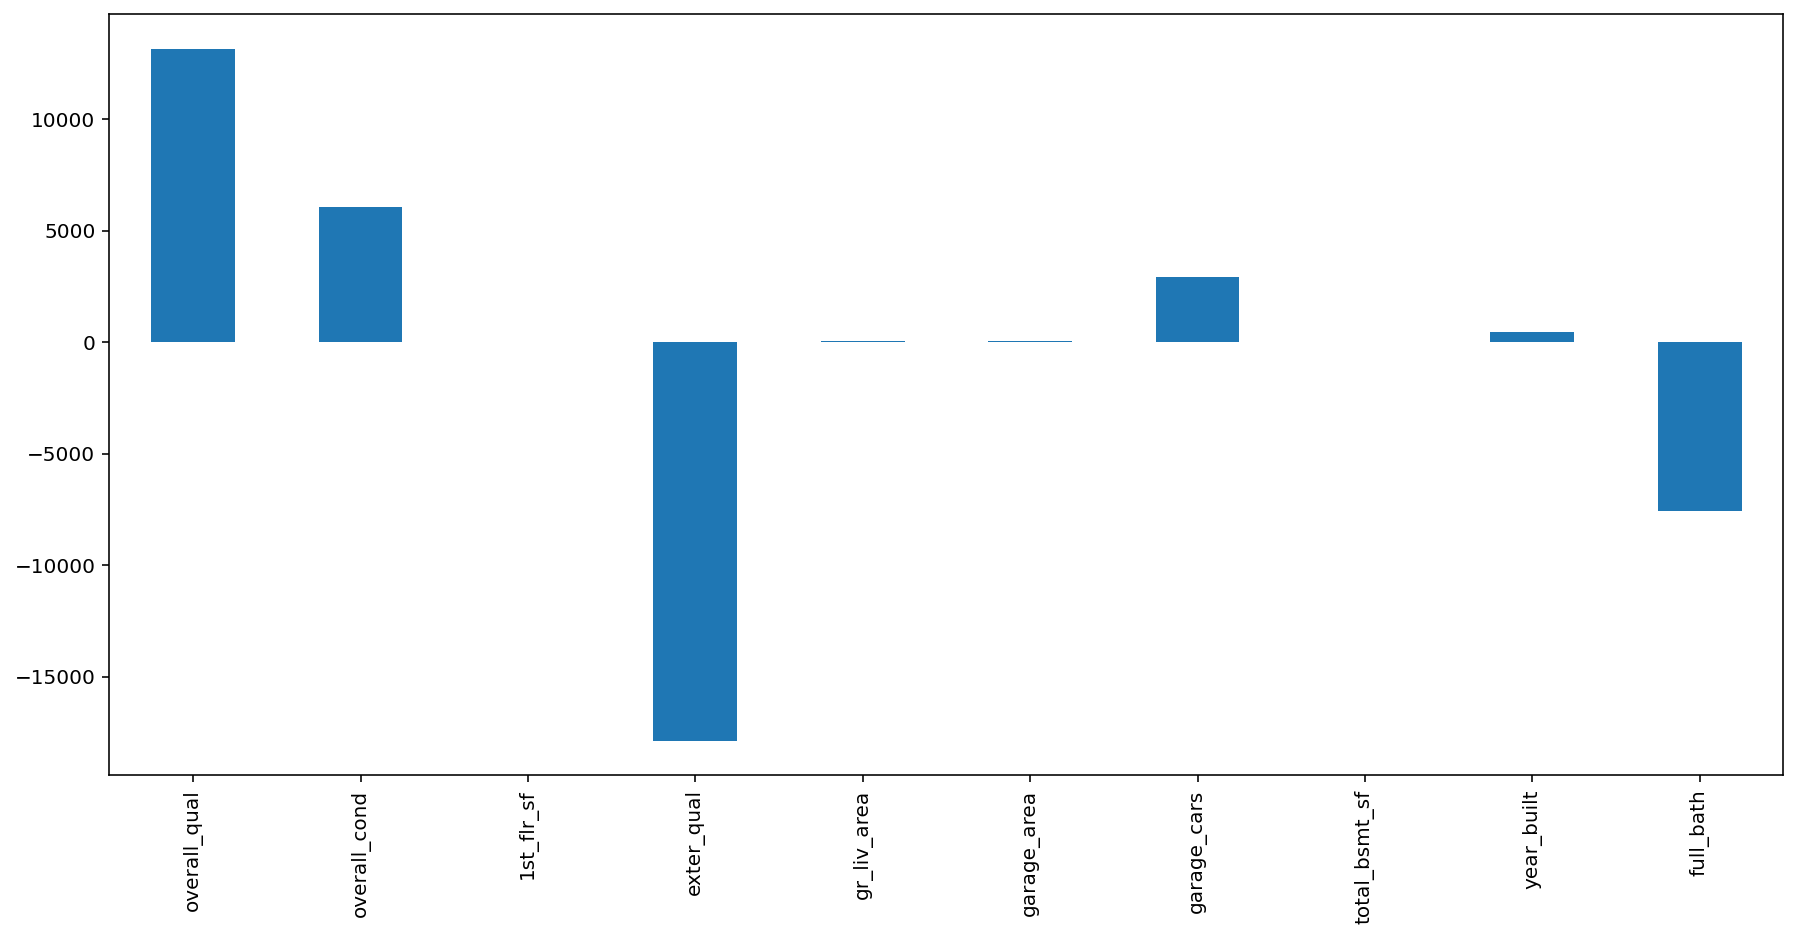

In [41]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

In [42]:
ridge_df = pd.DataFrame([ridge.coef_, features], index = ['Coefficients', 'Features']).T
ridge_df = ridge_df.set_index('Features')
ridge_df['Coefficients'] = np.abs(ridge_df['Coefficients'])
ridge_df = ridge_df.sort_values(by='Coefficients',ascending=False)
ridge_df.head(10)

,Coefficients
Features,
exter_qual,17879.8
overall_qual,13143.4
full_bath,7581.06
overall_cond,6037.91
garage_cars,2917.92
year_built,427.505
gr_liv_area,50.1959
garage_area,31.3244
total_bsmt_sf,21.6762


Text(0.5, 0, 'Strenth of Predictor')

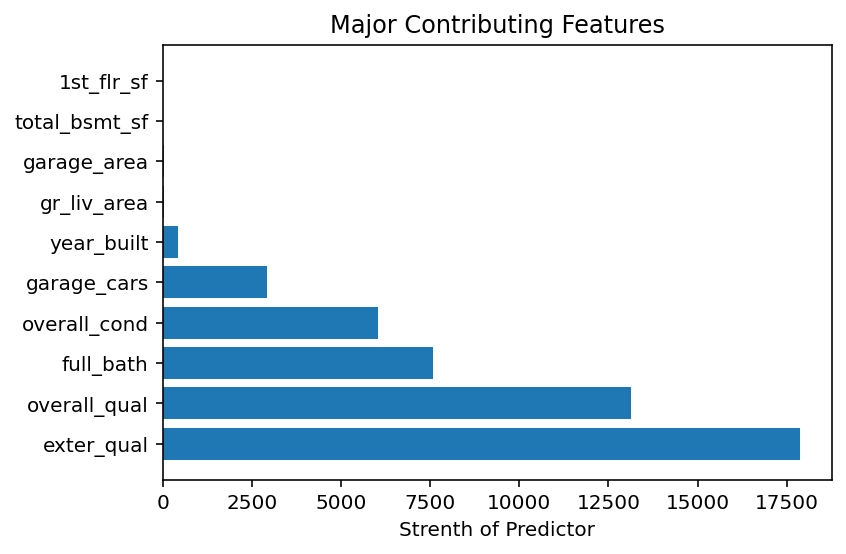

In [43]:
plt.barh(y=ridge_df.index[:10], width=ridge_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

In [44]:
pred = ridge.predict(X_test)
residuals = y_test - pred
residuals[:5]  #look at the first fiveID

1838     20378.057826
179     -27279.760677
122    -155300.986318
1179    -17594.158621
1140      -488.046927
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

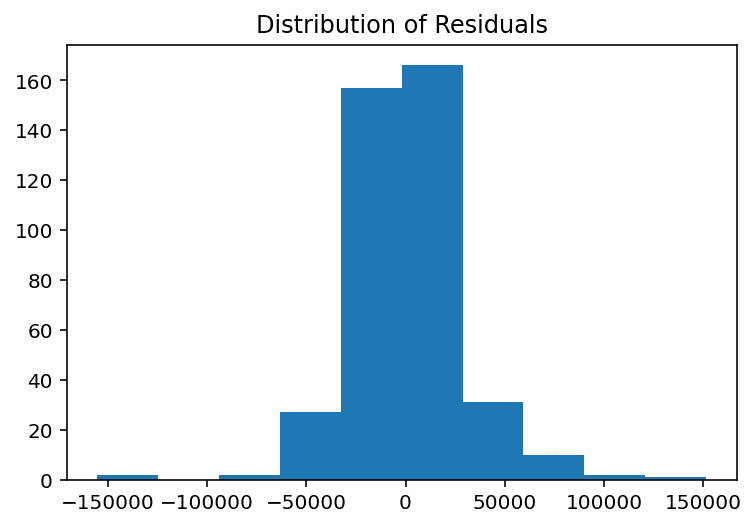

In [45]:
plt.hist(residuals);
plt.title('Distribution of Residuals')

In [46]:
sample_prices = y_test.values[0]
np.log(sample_prices)

12.066810578196666

Text(0.5, 1.0, 'Transformed Residuals')

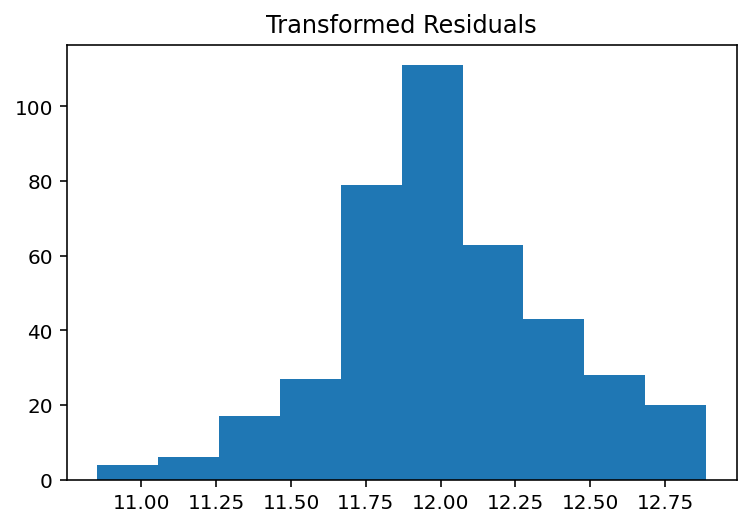

In [47]:
plt.hist(np.log(y_test));
plt.title('Transformed Residuals')

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

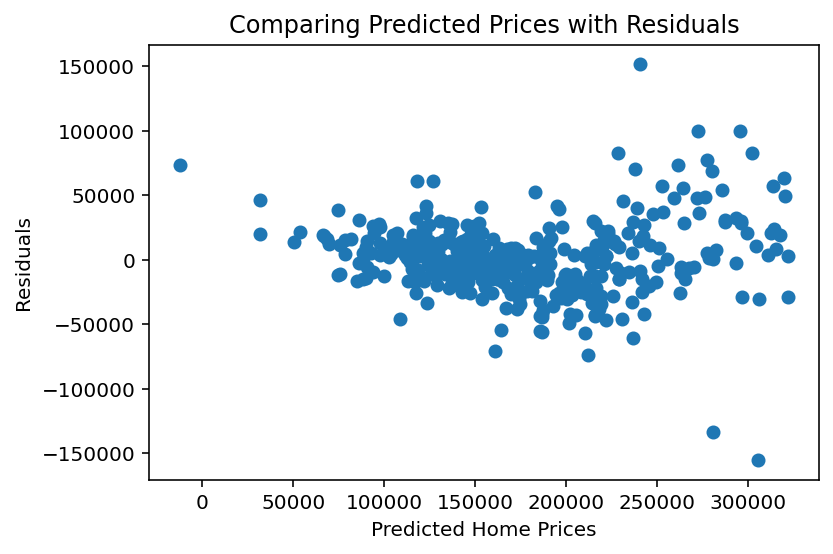

In [48]:
#interdcept 182000
#slope for quality is 19500
plt.scatter(x=pred,y=residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

# Now with Test data #

In [49]:
s_test.shape

(878, 81)

In [50]:
X_test_data.head()

,overall_qual,overall_cond,1st_flr_sf,exter_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,year_built,full_bath
0,6,8,908,3,1928,440,1,1020,1910,2
1,5,4,1967,3,1967,580,2,1967,1977,2
2,7,5,664,2,1496,426,2,654,2006,2
3,5,6,968,2,968,480,2,968,1923,1
4,6,5,1394,3,1394,514,2,1394,1963,1


In [51]:
X_test_data.corr(),s_train['saleprice'].sort_values()

(               overall_qual  overall_cond  1st_flr_sf  exter_qual  \
 overall_qual       1.000000     -0.122401    0.471428   -0.716261   
 overall_cond      -0.122401      1.000000   -0.171535    0.141667   
 1st_flr_sf         0.471428     -0.171535    1.000000   -0.376592   
 exter_qual        -0.716261      0.141667   -0.376592    1.000000   
 gr_liv_area        0.576049     -0.127846    0.546694   -0.417955   
 garage_area        0.560325     -0.189795    0.469661   -0.468628   
 garage_cars        0.627462     -0.211422    0.437563   -0.520520   
 total_bsmt_sf      0.536911     -0.210064    0.773006   -0.463317   
 year_built         0.582000     -0.363553    0.276322   -0.578191   
 full_bath          0.535192     -0.202914    0.372106   -0.474577   
 
                gr_liv_area  garage_area  garage_cars  total_bsmt_sf  \
 overall_qual      0.576049     0.560325     0.627462       0.536911   
 overall_cond     -0.127846    -0.189795    -0.211422      -0.210064   
 1st_flr_sf 

In [52]:
test_pred = ridge.predict(X_test_data)

In [53]:
test_pred[:10]

array([168654.30637497, 207155.5634627 , 191464.43066636, 130293.11640145,
       175286.87734625, 101379.99190186, 112105.18287788, 157957.52787182,
       211837.76406776, 166494.35742666])

In [54]:
s_test['saleprice'] = test_pred

In [55]:
s_test.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,1,...,0,0,NaN,NaN,NaN,0,4,2006,WD,168654.306375
1,1,2718,905108090,90,RL,0.0,9662,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,8,2006,WD,207155.563463
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,9,2006,New,191464.430666
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,1,...,0,0,NaN,NaN,NaN,0,7,2007,WD,130293.116401
4,4,625,535105100,20,RL,0.0,9500,Pave,NaN,2,...,185,0,NaN,NaN,NaN,0,7,2009,WD,175286.877346


In [56]:
y_test_data = s_test['saleprice']

In [57]:
# Scale test set
X_td_scaled = sc.transform(X_test_data)
# y_td_scaled = sc.transform(y_test_data)

In [58]:
X_td_scaled.shape

(878, 10)

In [59]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100)).fit(X_td_scaled, y_test_data)
ridge

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [60]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8469678914187746

In [61]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [62]:
ridge.score(X_train, y_train)

0.8501087808144672

In [63]:
ridge.score(X_test, y_test)

0.8204985214189768

In [64]:
ridge.score(X_td_scaled, y_test_data)

-256.7582192528209

In [65]:
s_test.columns

Index(['Unnamed: 0', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_b

In [66]:
s_test.rename(columns={'id': 'ID', 'saleprice': 'SalePrice'}, errors="raise", inplace=True)

In [67]:
submission = s_test[['ID', 'SalePrice']]

In [68]:
submission.to_csv('datasets/submission_4.csv', index=False)